In [28]:
import pandas as pd
import numpy as np

full_penguins = pd.read_csv('penguins_binary_classification.csv')

full_penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            274 non-null    object 
 1   island             274 non-null    object 
 2   bill_length_mm     274 non-null    float64
 3   bill_depth_mm      274 non-null    float64
 4   flipper_length_mm  274 non-null    float64
 5   body_mass_g        274 non-null    float64
 6   year               274 non-null    int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 15.1+ KB


In [29]:
full_penguins.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,2007
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,2007
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,2007


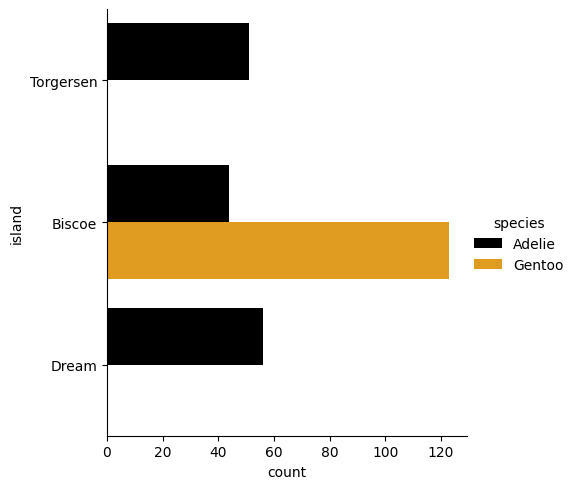

In [30]:
full_penguins.species.unique()

pallete = {
    "Adelie" :"black",
    "Gentoo" : "orange"
}

import seaborn as sns

sns.catplot(data=full_penguins, y="island", hue="species", kind="count", palette=pallete)

In [35]:
from sklearn.preprocessing import OneHotEncoder

categorical_features = ["island"]
categorical_encoder = OneHotEncoder(sparse_output=False)

In [32]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_features = ["bill_length_mm",	"bill_depth_mm",	"flipper_length_mm",	"body_mass_g",	"year"]

In [36]:
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers=[("cat", categorical_encoder, categorical_features)])

ct.set_output(transform="pandas")
encoded_features = ct.fit_transform(full_penguins)
encoded_features.head()

,cat__island_Biscoe,cat__island_Dream,cat__island_Torgersen
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [44]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
encoded_label = label_encoder.fit_transform(full_penguins.species)
encoded_penguins = encoded_features.assign(species=encoded_label)
encoded_penguins.head()

full_penguins.head()

columns_for_training = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g", "year"]

encoded_penguins = pd.concat([full_penguins[columns_for_training],encoded_penguins], axis=1)

encoded_penguins.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,cat__island_Biscoe,cat__island_Dream,cat__island_Torgersen,species
0,39.1,18.7,181.0,3750.0,2007,0.0,0.0,1.0,0
1,39.5,17.4,186.0,3800.0,2007,0.0,0.0,1.0,0
2,40.3,18.0,195.0,3250.0,2007,0.0,0.0,1.0,0
3,36.7,19.3,193.0,3450.0,2007,0.0,0.0,1.0,0
4,39.3,20.6,190.0,3650.0,2007,0.0,0.0,1.0,0


In [45]:
list(label_encoder.inverse_transform([0,1]))

['Adelie', 'Gentoo']

In [49]:
print(encoded_penguins.flipper_length_mm.corr(encoded_penguins.species))
print(encoded_penguins.bill_depth_mm.corr(encoded_penguins.species))
print(encoded_penguins.flipper_length_mm.corr(encoded_penguins.species))
print(encoded_penguins.body_mass_g.corr(encoded_penguins.species))



0.9017964035172064
-0.8326064366975109
0.9017964035172064
0.8198367781987648


In [57]:
from sklearn.model_selection import train_test_split
X = encoded_penguins[encoded_penguins.columns.difference(["species"])]

y = encoded_penguins.species

XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=0)

In [58]:
from sklearn.metrics import f1_score, classification_report
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(XTrain, yTrain)
preds = model.predict(XTest)

In [59]:
print(classification_report(yTest, preds))
print("Predicted labels: ", preds)
print("F1-score: ", f1_score(yTest, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        27

    accuracy                           1.00        55
   macro avg       1.00      1.00      1.00        55
weighted avg       1.00      1.00      1.00        55

Predicted labels:  [1 1 1 0 1 1 0 1 0 1 1 1 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1
 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 0 0 1]
F1-score:  1.0


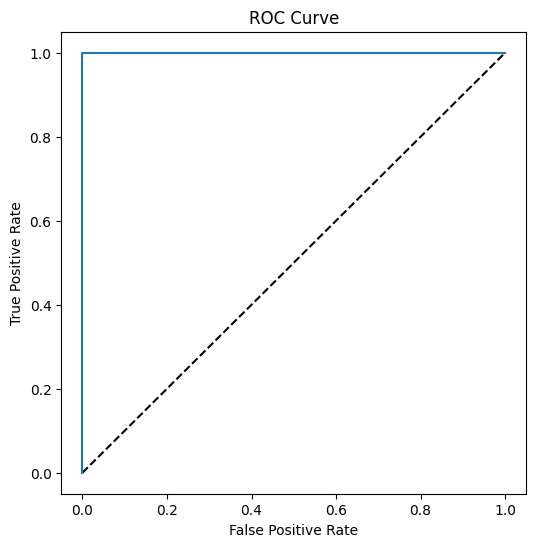

In [60]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

y_scores = model.predict_proba(XTest)
fpr, tpr, thresholds = roc_curve(yTest, y_scores[:,1])

fig = plt.figure(figsize=(6, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [56]:
auc = roc_auc_score(yTest,y_scores[:,1])
print(auc)

1.0
